In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [21]:
df = pd.read_csv("train.csv")

In [22]:
df.shape

(891, 12)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [24]:
df['Embarked'].value_counts()
df['Embarked'] = df['Embarked'].fillna('S')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

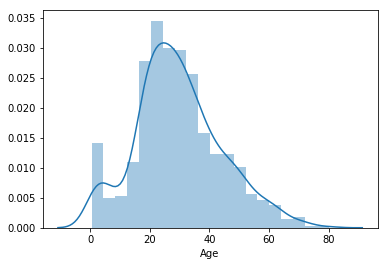

In [25]:
sns.distplot(df[df['Age'].notnull()]['Age'])
df['Age'].describe()

In [26]:
df['Age'] = df['Age'].interpolate()

In [27]:
df['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

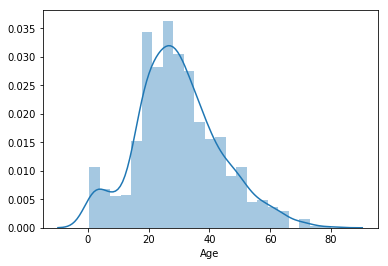

In [29]:
sns.distplot(df['Age'])

In [30]:
len(df['Cabin'].drop_duplicates())

148

In [31]:
df = df.drop('Cabin', axis=1)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


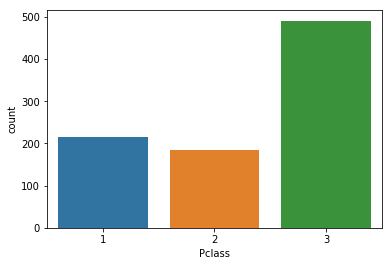

In [34]:
sns.countplot(x='Pclass', data=df)

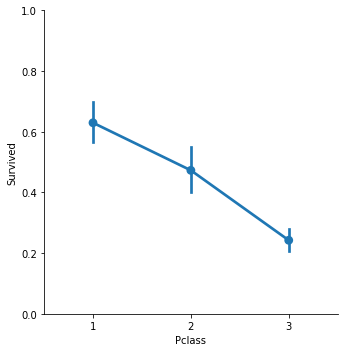

In [35]:
g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived', size=5)
g.map(sns.pointplot)
g.set(ylim=(0, 1))

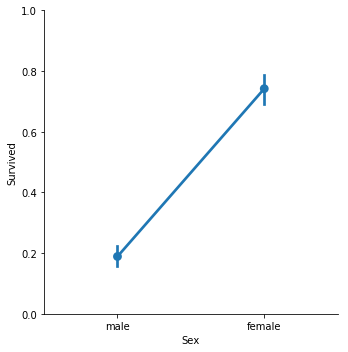

In [36]:
h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', size=5)
h.map(sns.pointplot)
h.set(ylim=(0, 1))

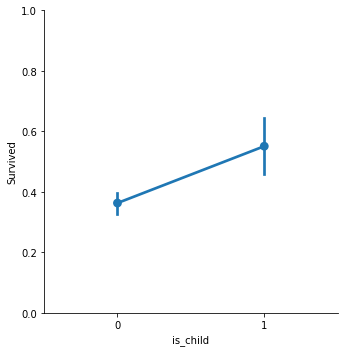

In [37]:
df['is_child'] = df['Age'].apply(lambda x: 1 if x <= 15 else 0)
i = sns.PairGrid(data=df, x_vars=['is_child'], y_vars='Survived', size=5)
i.map(sns.pointplot)
i.set(ylim=(0, 1))

In [38]:
df['family'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)

In [39]:
df['is_alone'] = df['family'].apply(lambda x: 1 if x == 0 else 0)

In [40]:
df['is_female'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df = df.drop('Sex', axis=1)
df.head()

,Survived,Pclass,Age,Fare,Embarked,is_child,family,is_alone,is_female
0,0,3,22.0,7.2500,S,0,1,0,0
1,1,1,38.0,71.2833,C,0,1,0,1
2,1,3,26.0,7.9250,S,0,0,1,1
3,1,1,35.0,53.1000,S,0,1,0,1
4,0,3,35.0,8.0500,S,0,0,1,0


In [41]:
df = pd.get_dummies(df, prefix=['is'])

In [42]:
df.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,1,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,1
4,0,3,35.0,8.0500,0,0,1,0,0,0,1


In [43]:
X, y = df.drop(['Survived'], axis=1), df['Survived']

In [44]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

In [45]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [48]:
classifier = GradientBoostingClassifier()
classifier.fit(train_X, train_y)
print(classifier.score(test_X, test_y))

0.8026905829596412
